In [104]:
!pip install pandas
!pip install yfinance
!pip install numpy
!pip install scipy
!pip install plotly
!pip install matplotlib
!pip install seaborn
!pip install python-bcb
!pip install ipeadatapy
!pip install statsmodels

In [105]:
!pip install sklearn
!pip install vectorbt
!pip install sweetviz

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [106]:
import pandas as pd
import yfinance as yf
import numpy as np
import scipy
import plotly
import matplotlib.pyplot as plt
import plotly.express as px
import sklearn
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sb

In [107]:
from scipy import stats
import pylab
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

import vectorbt as vbt

import seaborn as sb
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import sweetviz as sv

In [108]:
ibov=yf.download('^BVSP', period='max')['Close']

[*********************100%***********************]  1 of 1 completed


In [109]:
ibov.shape

(7918, 1)

In [110]:
ibov.head(5)

Ticker,^BVSP
Date,
1993-04-27,24.500000
1993-04-28,24.299999
1993-04-29,23.700001
1993-04-30,24.100000
1993-05-03,24.100000


In [111]:
fig01=px.histogram(ibov['^BVSP'], color_discrete_sequence=['lightseagreen'])

fig01.add_vline(x=np.mean(ibov['^BVSP']), line_width=3, line_color='red')
fig01.add_vline(x=np.median(ibov['^BVSP']), line_width=3, line_dash='dash', line_color='red')

fig01.show()

In [112]:
rets_ibov=ibov.pct_change().dropna()

In [113]:
rets_ibov.head()

Ticker,^BVSP
Date,
1993-04-28,-0.008163
1993-04-29,-0.024691
1993-04-30,0.016878
1993-05-03,0.000000
1993-05-04,0.033195


In [114]:
fig02=px.histogram(rets_ibov, color_discrete_sequence=['lightseagreen'])

fig02.add_vline(x=np.mean(rets_ibov), line_width=3, line_color='red')
fig02.add_vline(x=np.median(rets_ibov), line_width=3, line_dash='dash', line_color='red')

fig02.show()

In [115]:
teste_normalidade=stats.normaltest(rets_ibov['^BVSP'])
print(teste_normalidade)

NormaltestResult(statistic=np.float64(2467.3498556187888), pvalue=np.float64(0.0))


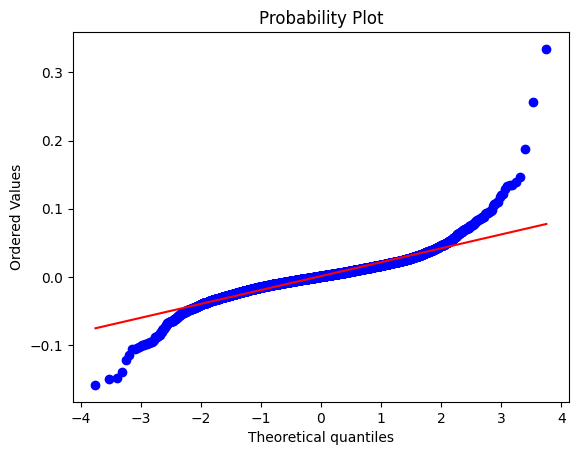

In [116]:
stats.probplot(rets_ibov['^BVSP'], dist='norm', plot=pylab)
pylab.show()

In [117]:
stats.skew(rets_ibov['^BVSP'])

np.float64(0.842935035215523)

In [118]:
stats.kurtosis(rets_ibov['^BVSP'])

np.float64(15.736992519729917)

In [119]:
petr_dividends=vbt.YFData.download('PETR4.SA', start='2000-01-01').get(['Close', 'Dividends'])

In [120]:
petr_dividends.head()

,Close,Dividends
Date,,
2000-01-03 02:00:00+00:00,1.449582,0.0
2000-01-04 02:00:00+00:00,1.369393,0.0
2000-01-05 02:00:00+00:00,1.355575,0.0
2000-01-06 02:00:00+00:00,1.350888,0.0
2000-01-07 02:00:00+00:00,1.357056,0.0


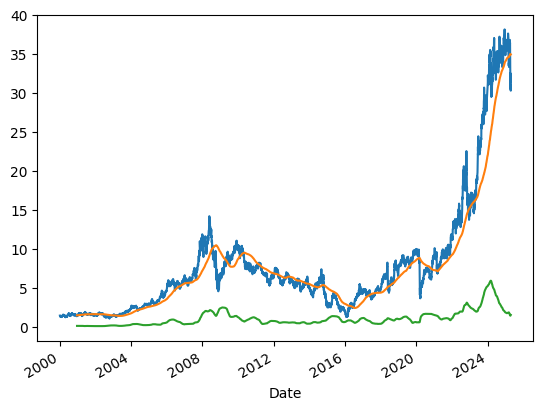

In [121]:
petr_dividends['Close'].plot();
petr_dividends['Close'].rolling(252).mean().plot();
petr_dividends['Close'].rolling(252).std().plot();

<Axes: xlabel='Date'>

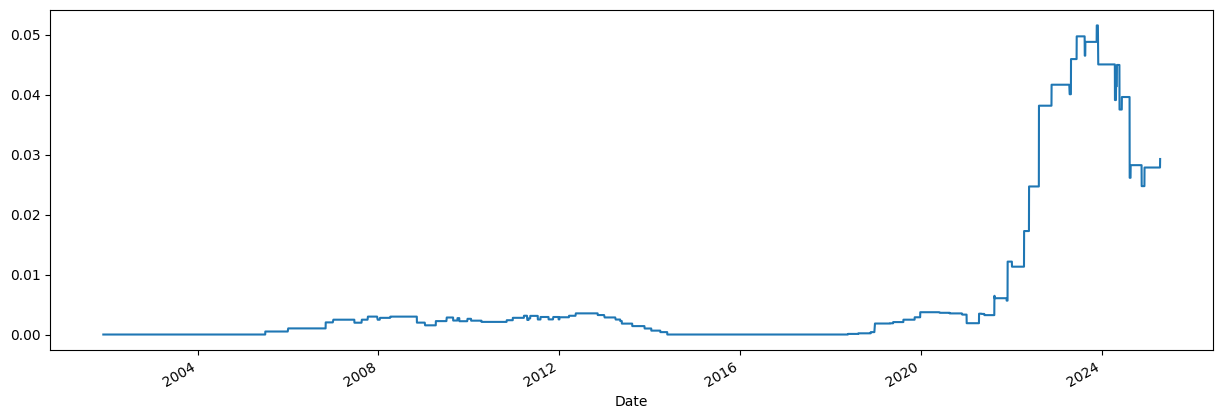

In [122]:
petr_dividends['Dividends'].rolling(window=500).mean().plot(figsize=(15, 5))

In [123]:
petr_dividends.drop(petr_dividends[petr_dividends['Dividends']==0].index, inplace=True)

In [124]:
petr_dividends.head()

,Close,Dividends
Date,,
2005-07-01 03:00:00+00:00,3.400363,0.250663
2006-01-02 02:00:00+00:00,4.856210,0.259000
2006-11-01 03:00:00+00:00,5.540800,0.500750
2007-01-02 02:00:00+00:00,6.627923,0.225000
2007-08-20 03:00:00+00:00,6.160747,0.251700


In [125]:
px.histogram(petr_dividends['Dividends'], color_discrete_sequence=['lightseagreen'])

In [126]:
petr_dividends['Dividend_Yield'] = petr_dividends['Dividends'] / petr_dividends['Close']*100

<Axes: xlabel='Date'>

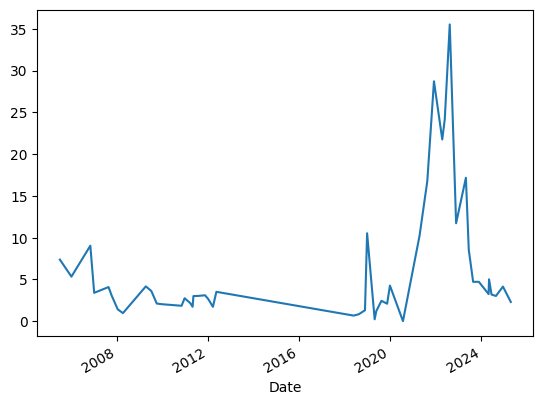

In [127]:
petr_dividends['Dividend_Yield'].plot()

In [128]:
fig03=px.scatter(x=petr_dividends['Close'], y=petr_dividends['Dividend_Yield'], width=500)
fig03.update_layout(width=500, height=500, template='plotly_dark', yaxis_title='Dividend Yield', xaxis_title='Close')
fig03.show()

In [129]:
corr, p = stats.pearsonr(petr_dividends['Close'], petr_dividends['Dividend_Yield'])
print("Correlação de Pearson: ", corr,". P-Value: ", p)

Correlação de Pearson:  0.093230604634073 . P-Value:  0.5240226617394793


In [130]:
corr, p = stats.spearmanr(petr_dividends['Close'], petr_dividends['Dividend_Yield'])
print("Correlação de Spearman: ", corr,". P-Value: ", p)

Correlação de Spearman:  0.2292857142857143 . P-Value:  0.1130208089663072


In [131]:
dolar=pd.read_csv('STP-20250330171241828.csv', encoding='latin-1', sep=';')
dolar.rename(columns={'Data':'Date', '1 - Taxa de câmbio - Livre - Dólar americano (venda) - diário - u.m.c./US$':'Dólar'}, inplace=True)
sp500 = yf.download('^GSPC')['Close']
sp500['Date'] = sp500.index
sp500.reset_index(drop=True, inplace=True)
sp500['Date'] = pd.to_datetime(sp500['Date']).dt.strftime('%d/%m/%Y')
ibov['Date'] = ibov.index
ibov.reset_index(drop=True, inplace=True)
ibov['Date'] = pd.to_datetime(ibov['Date']).dt.strftime('%d/%m/%Y')
dados=pd.merge(dolar, sp500, how='inner', on='Date')
dados=pd.merge(dados, ibov, how='inner', on='Date')
dados['Dólar'] = dados['Dólar'].str.replace(',', '.').astype(float)
dados.head()

[*********************100%***********************]  1 of 1 completed


,Date,Dólar,^GSPC,^BVSP
0,01/04/2024,5.0532,5243.770020,126990.0
1,02/04/2024,5.0476,5205.810059,127549.0
2,03/04/2024,5.0724,5211.490234,127318.0
3,04/04/2024,5.0237,5147.209961,127428.0
4,05/04/2024,5.0520,5204.339844,126795.0


In [132]:
from matplotlib import dates as mdates

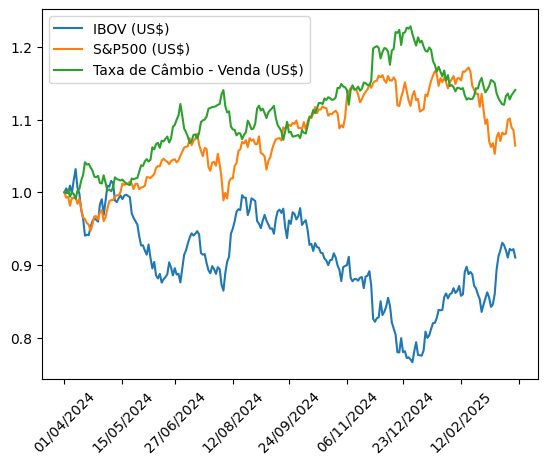

In [133]:
ibov_dolarizado=dados['^BVSP']/dados['Dólar']
ibov_dolarizado_indice = ibov_dolarizado / ibov_dolarizado.iloc[0]
sp500_indice = dados['^GSPC'] / dados['^GSPC'].iloc[0]
dolar_indice = dados['Dólar'] / dados['Dólar'].iloc[0]
plt.plot(dados['Date'], ibov_dolarizado_indice.values, label='IBOV (US$)');
plt.plot(dados['Date'], sp500_indice.values, label = 'S&P500 (US$)');
plt.plot(dados['Date'], dolar_indice.values, label='Taxa de Câmbio - Venda (US$)');
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [134]:
acoes_bolsa = pd.read_csv('acoes-listadas-b3.csv')

In [135]:
acoes_bolsa = acoes_bolsa['Ticker']+'.SA'

In [136]:
tickers=[]
for i in range(len(acoes_bolsa)):
  acao=acoes_bolsa[i]
  tickers.append(acao)
tickers = list(tickers)

In [137]:
dados_ibov=yf.download(tickers, start='2010-01-01')['Close']

[*********************100%***********************]  405 of 405 completed
ERROR:yfinance:
5 Failed downloads:
ERROR:yfinance:['BIOM11.SA', 'AZEV11.SA', 'DASA11.SA', 'PINE11.SA', 'AMAR11.SA']: YFTzMissingError('possibly delisted; no timezone found')


In [138]:
dados_ibov.dropna(axis=1, inplace=True)
dados_ibov

Ticker,ABCB4.SA,ABEV3.SA,AFLT3.SA,AGRO3.SA,AHEB3.SA,AHEB5.SA,AHEB6.SA,ALPA3.SA,ALPA4.SA,AMAR3.SA,...,VALE3.SA,VIVR3.SA,VIVT3.SA,VLID3.SA,VULC3.SA,WEGE3.SA,WHRL3.SA,WHRL4.SA,WLMM4.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,3.810937,3.563651,6.406689,4.707218,22.192442,9.84313,10.0,2.700172,2.478655,44.321712,...,23.368811,21785.945312,3.927134,9.110818,16.810015,2.007742,1.007193,0.998692,4.957878,5.535983
2010-01-05,3.912767,3.584614,6.406689,4.707218,22.192442,9.84313,10.0,2.700172,2.487276,46.048531,...,23.586660,21660.376953,3.912580,9.101376,17.011732,2.003360,1.007193,0.990180,4.957878,5.602295
2010-01-06,3.977569,3.621181,6.406689,4.707218,22.192442,9.84313,10.0,2.700172,2.480810,46.010159,...,24.085894,23041.619141,3.846054,9.134422,16.810015,2.014315,1.007193,0.975994,5.146151,5.693761
2010-01-07,3.918940,3.638186,6.406689,4.841050,22.192442,9.84313,10.0,2.653310,2.506675,47.122993,...,24.185736,23229.970703,3.846054,9.158021,17.280695,2.048269,1.007193,0.973157,5.164979,5.602295
2010-01-08,3.888081,3.631196,6.406689,4.841050,22.192442,9.84313,10.0,2.700172,2.532538,49.425430,...,24.421741,23104.402344,3.842935,9.346848,17.280695,2.122752,1.007193,0.978832,5.334424,5.602295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-11,19.280001,13.480000,7.300000,22.040001,45.000000,50.00000,55.0,7.400000,7.280000,1.290000,...,53.660000,0.960000,25.150972,25.110001,15.380000,45.119999,3.900000,4.230000,30.500000,12.950000
2025-04-14,19.410000,13.680000,7.000000,22.450001,45.000000,50.00000,55.0,7.500000,7.380000,1.330000,...,54.360001,0.980000,25.500000,24.320000,16.280001,45.820000,4.000000,4.310000,29.110001,13.240000
2025-04-15,19.660000,13.660000,7.000000,22.049999,45.000000,50.00000,55.0,7.500000,7.360000,1.320000,...,53.810001,0.980000,25.459999,24.670000,16.540001,45.820000,4.070000,4.370000,30.000000,13.510000


In [ ]:
for i in dados_ibov.columns:
  dados_ibov['Retorno Diário '+i] = dados_ibov[i].pct_change()

In [140]:
dados_ibov.dropna(axis=0, inplace=True)
dados_ibov

Ticker,ABCB4.SA,ABEV3.SA,AFLT3.SA,AGRO3.SA,AHEB3.SA,AHEB5.SA,AHEB6.SA,ALPA3.SA,ALPA4.SA,AMAR3.SA,...,Retorno Diário VALE3.SA,Retorno Diário VIVR3.SA,Retorno Diário VIVT3.SA,Retorno Diário VLID3.SA,Retorno Diário VULC3.SA,Retorno Diário WEGE3.SA,Retorno Diário WHRL3.SA,Retorno Diário WHRL4.SA,Retorno Diário WLMM4.SA,Retorno Diário YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-05,3.912767,3.584614,6.406689,4.707218,22.192442,9.84313,10.0,2.700172,2.487276,46.048531,...,0.009322,-0.005764,-0.003706,-0.001036,0.012000,-0.002182,0.000000,-0.008523,0.000000,0.011978
2010-01-06,3.977569,3.621181,6.406689,4.707218,22.192442,9.84313,10.0,2.700172,2.480810,46.010159,...,0.021166,0.063768,-0.017003,0.003631,-0.011858,0.005468,0.000000,-0.014326,0.037974,0.016327
2010-01-07,3.918940,3.638186,6.406689,4.841050,22.192442,9.84313,10.0,2.653310,2.506675,47.122993,...,0.004145,0.008174,0.000000,0.002583,0.028000,0.016857,0.000000,-0.002907,0.003659,-0.016064
2010-01-08,3.888081,3.631196,6.406689,4.841050,22.192442,9.84313,10.0,2.700172,2.532538,49.425430,...,0.009758,-0.005405,-0.000811,0.020619,0.000000,0.036364,0.000000,0.005831,0.032807,0.000000
2010-01-11,3.962140,3.586943,6.406689,4.614920,22.192442,9.84313,10.0,2.700172,2.533617,50.231274,...,-0.002973,-0.002717,-0.012713,0.002525,-0.007782,-0.011352,0.014286,-0.011594,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-11,19.280001,13.480000,7.300000,22.040001,45.000000,50.00000,55.0,7.400000,7.280000,1.290000,...,0.016673,-0.020408,-0.003752,0.027835,0.008525,0.004676,-0.002558,-0.013986,-0.016129,0.011719
2025-04-14,19.410000,13.680000,7.000000,22.450001,45.000000,50.00000,55.0,7.500000,7.380000,1.330000,...,0.013045,0.020833,0.013877,-0.031462,0.058518,0.015514,0.025641,0.018913,-0.045574,0.022394
2025-04-15,19.660000,13.660000,7.000000,22.049999,45.000000,50.00000,55.0,7.500000,7.360000,1.320000,...,-0.010118,0.000000,-0.001569,0.014391,0.015971,0.000000,0.017500,0.013921,0.030574,0.020393


In [ ]:
for i in dados_ibov.columns:
  if 'Retorno' in i:
    dados_ibov['Retorno Acumulado '+i[-8:]] = (1+dados_ibov[i]).cumprod()

In [229]:
retornos_acumulados=pd.DataFrame()

for i in dados_ibov.columns:
  if 'Retorno Acumulado' in i:
    retornos_acumulados[i]=dados_ibov[i]

<ipython-input-229-951eb68a7be7>:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-229-951eb68a7be7>:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-229-951eb68a7be7>:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-229-951eb68a7be7>:5: PerformanceWarning:

In [143]:
retornos_acumulados.tail()

,Retorno Acumulado ABCB4.SA,Retorno Acumulado ABEV3.SA,Retorno Acumulado AFLT3.SA,Retorno Acumulado AGRO3.SA,Retorno Acumulado AHEB3.SA,Retorno Acumulado AHEB5.SA,Retorno Acumulado AHEB6.SA,Retorno Acumulado ALPA3.SA,Retorno Acumulado ALPA4.SA,Retorno Acumulado AMAR3.SA,...,Retorno Acumulado VALE3.SA,Retorno Acumulado VIVR3.SA,Retorno Acumulado VIVT3.SA,Retorno Acumulado VLID3.SA,Retorno Acumulado VULC3.SA,Retorno Acumulado WEGE3.SA,Retorno Acumulado WHRL3.SA,Retorno Acumulado WHRL4.SA,Retorno Acumulado WLMM4.SA,Retorno Acumulado YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2025-04-11,5.059124,3.782637,1.139434,4.682172,2.027717,5.079685,5.5,2.740566,2.937077,0.029105,...,2.296223,0.000044,6.404409,2.756064,0.914931,22.473005,3.872146,4.235541,6.151825,2.339241
2025-04-14,5.093236,3.838759,1.092608,4.769272,2.027717,5.079685,5.5,2.777601,2.977421,0.030008,...,2.326177,0.000045,6.493284,2.669354,0.968470,22.821655,3.971432,4.315646,5.871464,2.391626
2025-04-15,5.158837,3.833147,1.092608,4.684296,2.027717,5.079685,5.5,2.777601,2.969353,0.029782,...,2.302642,0.000045,6.483099,2.707770,0.983937,22.821655,4.040932,4.375724,6.050976,2.440398
2025-04-16,5.140469,3.897688,1.092608,4.637559,2.027717,5.079685,5.5,2.777601,2.884629,0.029105,...,2.249152,0.000045,6.554398,2.720941,0.972635,22.831617,3.872146,4.435803,6.079213,2.418722
2025-04-17,5.192949,3.928555,1.092608,4.499473,2.027717,5.079685,5.5,2.777601,2.916905,0.029557,...,2.262845,0.000045,6.725006,2.727527,0.990481,22.886405,3.872146,4.445816,6.351507,2.682451


In [144]:
ultimo_valor=retornos_acumulados.iloc[-1]

In [145]:
melhores_acoes=ultimo_valor.nlargest(10).index

In [146]:
retornos_acumulados_filtrado_melhores=retornos_acumulados[melhores_acoes]

<Axes: xlabel='Date'>

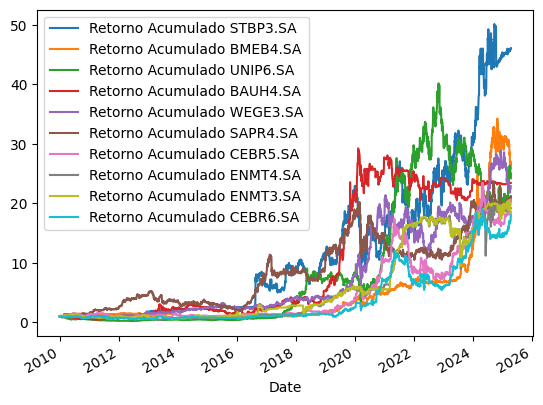

In [147]:
retornos_acumulados_filtrado_melhores.plot()

In [148]:
ibovespa=yf.download('^BVSP', period='max')['Close']

[*********************100%***********************]  1 of 1 completed


In [149]:
ibovespa['weekday'] = ibovespa.index.day_name()
ibovespa['rets'] = ibovespa['^BVSP'].pct_change()
ibovespa.dropna(inplace=True)

In [150]:
ibovespa.groupby('weekday')['rets'].mean()

,rets
weekday,
Friday,0.002133
Monday,-0.000066
Thursday,0.000459
Tuesday,0.002249
Wednesday,0.001775


In [151]:
ibovespa.groupby('weekday')['rets'].var()

,rets
weekday,
Friday,0.000483
Monday,0.000489
Thursday,0.000490
Tuesday,0.000430
Wednesday,0.000407


In [152]:
segunda=ibovespa.groupby('weekday')['rets'].get_group('Monday')
terca=ibovespa.groupby('weekday')['rets'].get_group('Tuesday')
quarta=ibovespa.groupby('weekday')['rets'].get_group('Wednesday')
quinta=ibovespa.groupby('weekday')['rets'].get_group('Thursday')
sexta=ibovespa.groupby('weekday')['rets'].get_group('Friday')

In [153]:
stats.levene(segunda, terca, quarta, quinta, sexta)

LeveneResult(statistic=np.float64(1.309699998437342), pvalue=np.float64(0.26376310482983045))

In [154]:
tukey_test = pairwise_tukeyhsd(endog=ibovespa['rets'], groups=ibovespa['weekday'], alpha=0.05)
print(tukey_test)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1    group2  meandiff p-adj   lower   upper  reject
---------------------------------------------------------
  Friday    Monday  -0.0022 0.0325 -0.0043 -0.0001   True
  Friday  Thursday  -0.0017 0.1832 -0.0038  0.0004  False
  Friday   Tuesday   0.0001 0.9999  -0.002  0.0022  False
  Friday Wednesday  -0.0004   0.99 -0.0024  0.0017  False
  Monday  Thursday   0.0005 0.9591 -0.0016  0.0026  False
  Monday   Tuesday   0.0023 0.0204  0.0002  0.0044   True
  Monday Wednesday   0.0018 0.1089 -0.0002  0.0039  False
Thursday   Tuesday   0.0018 0.1311 -0.0003  0.0039  False
Thursday Wednesday   0.0013 0.4143 -0.0008  0.0034  False
 Tuesday Wednesday  -0.0005 0.9714 -0.0025  0.0016  False
---------------------------------------------------------


In [155]:
ibovespa_filtrado = ibovespa[(ibovespa['weekday'] =='Monday') | (ibovespa['weekday'] =='Friday')]

In [156]:
ibovespa_filtrado['Monday'] = np.nan
ibovespa_filtrado['Friday'] = np.nan

for i in ibovespa_filtrado.index:
  if ibovespa_filtrado.loc[i, 'weekday'] == 'Monday':
    ibovespa_filtrado.loc[i, 'Monday'] = ibovespa_filtrado.loc[i, 'rets']
  else:
    ibovespa_filtrado.loc[i, 'Friday'] = ibovespa_filtrado.loc[i, 'rets']

<ipython-input-156-4c9e59ab1f54>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-156-4c9e59ab1f54>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [157]:
ibovespa_filtrado.head()

Ticker,^BVSP,weekday,rets,Monday,Friday
Date,,,,,
1993-04-30,24.100000,Friday,0.016878,NaN,0.016878
1993-05-03,24.100000,Monday,0.000000,0.000000,NaN
1993-05-07,25.799999,Friday,0.007812,NaN,0.007812
1993-05-10,25.200001,Monday,-0.023256,-0.023256,NaN
1993-05-14,27.799999,Friday,0.014599,NaN,0.014599


In [158]:
ibovespa_filtrado['semana_ano'] = np.nan
for i in range(len(ibovespa_filtrado) - 1):
  if pd.isna(ibovespa_filtrado.iloc[i]['Monday']):
    ibovespa_filtrado.iloc[i, ibovespa_filtrado.columns.get_loc('Monday')] = ibovespa_filtrado.iloc[i+1]['Monday']
    ibovespa_filtrado['semana_ano'] = ibovespa_filtrado.index.isocalendar().year.astype(str) + "_" + ibovespa_filtrado.index.isocalendar().week.astype(str)
ibovespa_filtrado.dropna(inplace=True)

A saída de streaming foi truncada nas últimas 5000 linhas.

<ipython-input-158-d3f7bc413b98>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-158-d3f7bc413b98>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-158-d3f7bc413b98>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

In [159]:
ibovespa_filtrado.drop(columns=['^BVSP', 'rets', 'weekday'], inplace=True)

<ipython-input-159-cf386b61676b>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [160]:
ibovespa_filtrado

Ticker,Monday,Friday,semana_ano
Date,,,
1993-04-30,0.000000,0.016878,1993_17
1993-05-07,-0.023256,0.007812,1993_18
1993-05-14,0.053957,0.014599,1993_19
1993-05-21,0.018072,0.037500,1993_20
1993-05-28,0.000000,0.002874,1993_21
...,...,...,...
2025-03-14,0.014555,0.026425,2025_11
2025-03-21,-0.007737,0.002956,2025_12
2025-03-28,-0.012449,-0.009365,2025_13


In [161]:
ibovespa_filtrado['dif']=ibovespa_filtrado.Friday-ibovespa_filtrado.Monday

<ipython-input-161-8bc043d4380d>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [162]:
teste_norm_seg_sex = stats.normaltest(ibovespa_filtrado['dif'])
print(teste_norm_seg_sex)

NormaltestResult(statistic=np.float64(663.6929109828054), pvalue=np.float64(7.601784274773518e-145))


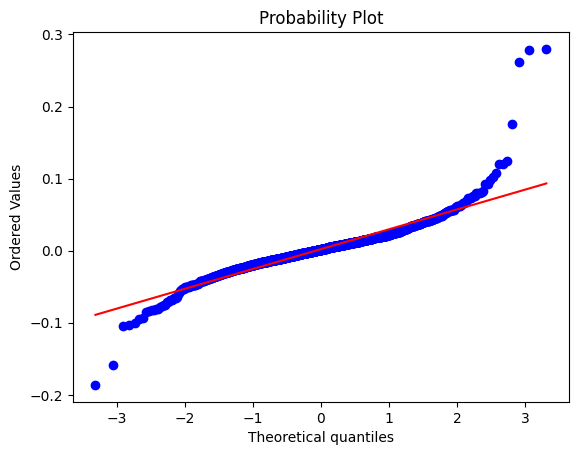

In [163]:
stats.probplot(ibovespa_filtrado['dif'], dist='norm', plot=pylab)
pylab.show()

In [164]:
stats.ttest_rel(ibovespa_filtrado['Monday'], ibovespa_filtrado['Friday'])

TtestResult(statistic=np.float64(-2.8563907337362897), pvalue=np.float64(0.004344283188726095), df=np.int64(1491))

In [165]:
ibov_ohlc=yf.download('^BVSP', period='max', interval='1d')
ibov_ohlc.columns=ibov_ohlc.columns.get_level_values(0)
ibov_ohlc=ibov_ohlc.resample('M').agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last'})
ibov_ohlc['Resultado_mes'] = (ibov_ohlc['Close'].pct_change()*100).round(2)
ibov_ohlc['Mês']=ibov_ohlc.index.month_name()
ibov_ohlc['Ano']=ibov_ohlc.index.year
ibov_ohlc['Mês_num']=ibov_ohlc.index.strftime('%m')
ibov_ohlc=ibov_ohlc.loc['2000':'2022']
ibov_ohlc.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed
<ipython-input-165-f5529566074b>:3: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [166]:
resultado_geral = pd.pivot_table(ibov_ohlc, values='Resultado_mes', index=['Ano'] , columns= ['Mês_num'], aggfunc=np.mean)
resultado_geral=resultado_geral.style.format('{:.2f}', na_rep='').applymap(lambda x: 'background-color: #81b585' if x>0 else 'background-color: #cf7a7a')
resultado_geral

<ipython-input-166-6a1ab34c12fd>:1: FutureWarning:

The provided callable <function mean at 0x7f22b07f9f80> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.

<ipython-input-166-6a1ab34c12fd>:2: FutureWarning:

Styler.applymap has been deprecated. Use Styler.map instead.



Mês_num,01,02,03,04,05,06,07,08,09,10,11,12
Ano,,,,,,,,,,,,
2000,-4.12,7.76,0.91,-12.81,-3.74,11.84,-1.63,5.42,-8.18,-6.66,-10.63,14.84
2001,15.82,-10.08,-9.14,3.32,-1.80,-0.61,-5.54,-6.64,-17.17,6.85,13.79,5.00
2002,-6.31,10.31,-5.54,-1.28,-1.71,-13.39,-12.35,6.34,-16.94,17.92,3.35,7.22
2003,-2.90,-6.03,9.66,11.38,6.89,-3.35,4.62,11.80,5.52,12.31,12.25,10.17
2004,-1.73,-0.44,1.78,-11.45,-0.32,8.21,5.62,2.09,1.94,-0.83,9.01,4.25
2005,-7.04,15.56,-5.43,-6.64,1.46,-0.62,3.96,7.69,12.62,-4.40,5.71,4.82
2006,14.73,0.59,-1.70,6.35,-9.50,0.28,1.22,-2.28,0.60,7.72,6.80,6.06
2007,0.38,-1.68,4.36,6.88,6.77,4.06,-0.38,0.84,10.67,8.03,-3.54,1.40
2008,-6.88,6.72,-3.97,11.32,6.96,-10.43,-8.48,-6.43,-11.03,-24.80,-1.77,2.61


In [167]:
teste_norm_ibov_ohlc = ibov_ohlc[['Mês_num', 'Resultado_mes']].groupby('Mês_num').agg(lambda x: stats.normaltest(x).pvalue)
teste_norm_ibov_ohlc

Price,Resultado_mes
Mês_num,
01,0.137649
02,0.685920
03,0.000082
04,0.754882
05,0.640768
06,0.901192
07,0.534325
08,0.512283
09,0.494974


Testing Normality Distribuition without periods of Great Crises (SubPrime and COVID-19)

In [168]:
ibov_ohlc_sem_crises=ibov_ohlc[~ibov_ohlc['Ano'].isin([2008, 2020])]

teste_norm_ibov_ohlc_sem_crises = ibov_ohlc_sem_crises[['Mês_num', 'Resultado_mes']].groupby('Mês_num').agg(lambda x: stats.normaltest(x).pvalue)
teste_norm_ibov_ohlc_sem_crises

Price,Resultado_mes
Mês_num,
01,0.111705
02,0.446556
03,0.313153
04,0.979249
05,0.759374
06,0.776575
07,0.459188
08,0.741196
09,0.364258


In [169]:
ibov_ohlc_jan = ibov_ohlc_sem_crises.groupby('Mês_num').get_group('01')['Resultado_mes']
ibov_ohlc_fev = ibov_ohlc_sem_crises.groupby('Mês_num').get_group('02')['Resultado_mes']
ibov_ohlc_mar = ibov_ohlc_sem_crises.groupby('Mês_num').get_group('03')['Resultado_mes']
ibov_ohlc_abr = ibov_ohlc_sem_crises.groupby('Mês_num').get_group('04')['Resultado_mes']
ibov_ohlc_mai = ibov_ohlc_sem_crises.groupby('Mês_num').get_group('05')['Resultado_mes']
ibov_ohlc_jun = ibov_ohlc_sem_crises.groupby('Mês_num').get_group('06')['Resultado_mes']
ibov_ohlc_jul = ibov_ohlc_sem_crises.groupby('Mês_num').get_group('07')['Resultado_mes']
ibov_ohlc_ago = ibov_ohlc_sem_crises.groupby('Mês_num').get_group('08')['Resultado_mes']
ibov_ohlc_set = ibov_ohlc_sem_crises.groupby('Mês_num').get_group('09')['Resultado_mes']
ibov_ohlc_out = ibov_ohlc_sem_crises.groupby('Mês_num').get_group('10')['Resultado_mes']
ibov_ohlc_nov = ibov_ohlc_sem_crises.groupby('Mês_num').get_group('11')['Resultado_mes']
ibov_ohlc_dez = ibov_ohlc_sem_crises.groupby('Mês_num').get_group('12')['Resultado_mes']

Testing Homoscedasticity of the Ibovespa Returns in different months

In [170]:
stats.levene(ibov_ohlc_jan, ibov_ohlc_fev, ibov_ohlc_mar, ibov_ohlc_abr, ibov_ohlc_mai, ibov_ohlc_jun, ibov_ohlc_jul, ibov_ohlc_ago, ibov_ohlc_set, ibov_ohlc_out, ibov_ohlc_nov, ibov_ohlc_dez)

LeveneResult(statistic=np.float64(0.6898841360552501), pvalue=np.float64(0.7477267667720083))

In [171]:
!pip install pingouin
import pingouin as pg
from pingouin import mixed_anova, read_dataset

In [172]:
anova_medidas_rep = pg.rm_anova(data=ibov_ohlc_sem_crises, dv='Resultado_mes', within='Mês_num', subject='Ano', detailed=True)
anova_medidas_rep

,Source,SS,DF,MS,F,p-unc,ng2,eps
0,Mês_num,528.274852,11,48.024987,1.142335,0.329546,0.048631,0.623794
1,Error,9249.039556,220,42.041089,NaN,NaN,NaN,NaN


In [173]:
df_post_hoc = pg.pairwise_ttests(data=ibov_ohlc, dv='Resultado_mes', within='Mês', subject='Ano')
df_post_hoc[df_post_hoc['p-unc']<0.05]

/usr/local/lib/python3.11/dist-packages/pingouin/pairwise.py:28: UserWarning:

pairwise_ttests is deprecated, use pairwise_tests instead.



,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
24,Mês,December,June,True,True,2.576221,22.0,two-sided,0.017228,3.122,0.638037
26,Mês,December,May,True,True,2.474114,22.0,two-sided,0.021549,2.598,0.654628


In [176]:
lista_ativos = ['^BVSP', '^GSPC']
dados_ibov_sp500 = yf.download(lista_ativos, start='2000-01-01')['Close']
dados_ibov_sp500.head(10)

[*********************100%***********************]  2 of 2 completed


Ticker,^BVSP,^GSPC
Date,,
2000-01-03,16930.0,1455.219971
2000-01-04,15851.0,1399.420044
2000-01-05,16245.0,1402.109985
2000-01-06,16107.0,1403.449951
2000-01-07,16309.0,1441.469971
2000-01-10,17022.0,1457.599976
2000-01-11,16573.0,1438.560059
2000-01-12,16617.0,1432.250000
2000-01-13,17298.0,1449.680054


In [177]:
dados_ibov_sp500['^BVSP_norm'] = dados_ibov_sp500['^BVSP']/dados_ibov_sp500['^BVSP'].iloc[0]
dados_ibov_sp500['^GSPC_norm'] = dados_ibov_sp500['^GSPC']/dados_ibov_sp500['^GSPC'].iloc[0]
figibovspnorm = px.line(dados_ibov_sp500, x=dados_ibov_sp500.index, y=dados_ibov_sp500.columns[2:4], width=832)
figibovspnorm.show()

<ipython-input-178-c8cf6bb320d7>:1: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.



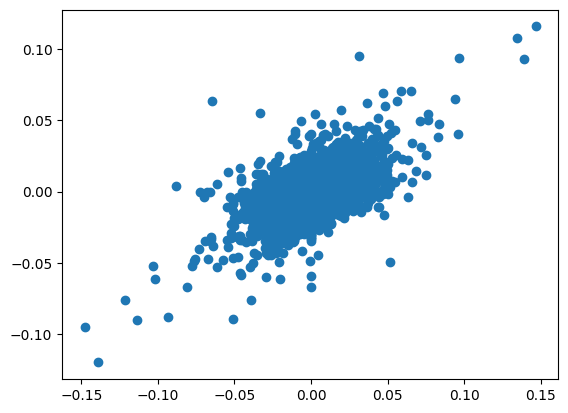

In [178]:
rets_ibov_sp500 = dados_ibov_sp500.pct_change()
rets_ibov_sp500.dropna(inplace=True)
rets_ibov_sp500.drop(columns=['^BVSP_norm', '^GSPC_norm'], inplace=True)
plt.scatter(rets_ibov_sp500['^BVSP'], rets_ibov_sp500['^GSPC'])

In [179]:
def calcula_correlacao_amostral_pearson(ticker1, ticker2):
  ativos=[ticker1, ticker2]
  dados=yf.download(ativos, period="max")['Close']
  rets=dados.pct_change()
  rets.dropna(inplace=True)
  plt.scatter(rets[ticker1], rets[ticker2], color='lightseagreen')
  corr, p = stats.pearsonr(rets[ticker1], rets[ticker2])
  print('Correlação de Pearson, r=%.3f' %corr,'p-value=%.8f' %p)

[*********************100%***********************]  2 of 2 completed
<ipython-input-179-0538006bae18>:4: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.



Correlação de Pearson, r=0.697 p-value=0.00000000


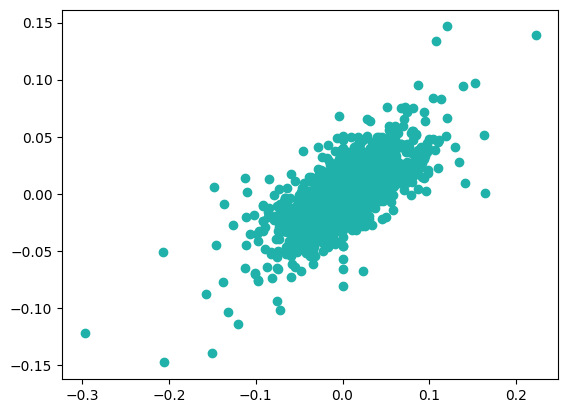

In [181]:
calcula_correlacao_amostral_pearson('PETR4.SA', '^BVSP')

[*********************100%***********************]  2 of 2 completed
<ipython-input-179-0538006bae18>:4: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.



Correlação de Pearson, r=0.759 p-value=0.00000000


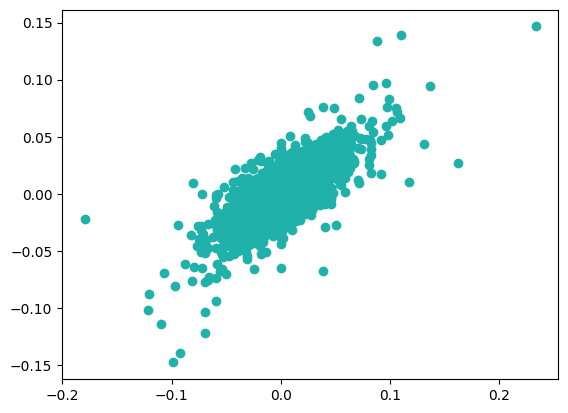

In [182]:
calcula_correlacao_amostral_pearson('ITUB4.SA', '^BVSP')

[*********************100%***********************]  2 of 2 completed
<ipython-input-179-0538006bae18>:4: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.



Correlação de Pearson, r=0.383 p-value=0.00000000


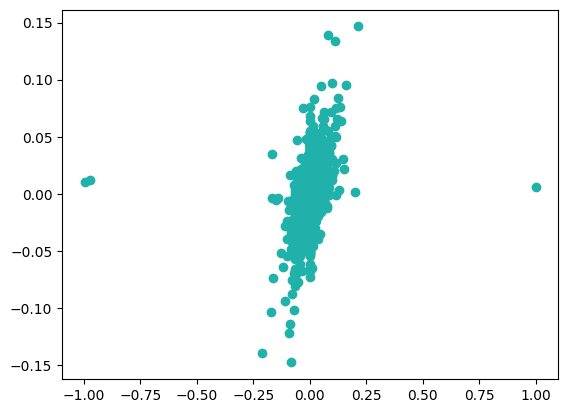

In [183]:
calcula_correlacao_amostral_pearson('LREN3.SA', '^BVSP')

In [184]:
def calcula_correlacao_amostral_spearman(ticker1, ticker2):
  ativos=[ticker1, ticker2]
  dados=yf.download(ativos, period="max")['Close']
  rets=dados.pct_change()
  rets.dropna(inplace=True)
  plt.scatter(rets[ticker1], rets[ticker2], color='lightseagreen')
  corr, p = stats.spearmanr(rets[ticker1], rets[ticker2])
  print('Correlação de Pearson, r=%.3f' %corr,'p-value=%.8f' %p)

[*********************100%***********************]  2 of 2 completed
<ipython-input-184-a4f9e8778d77>:4: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.



Correlação de Pearson, r=0.670 p-value=0.00000000


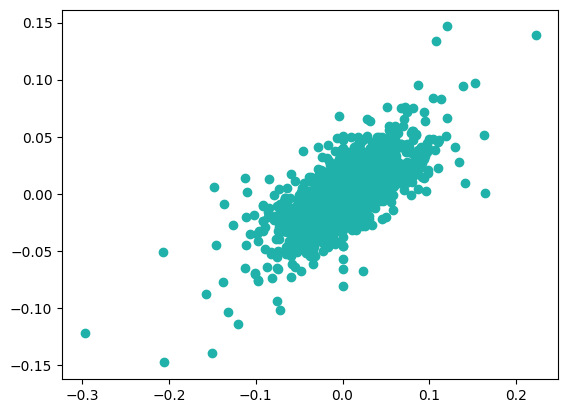

In [185]:
calcula_correlacao_amostral_spearman('PETR4.SA', '^BVSP')

[*********************100%***********************]  2 of 2 completed
<ipython-input-179-0538006bae18>:4: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.



Correlação de Pearson, r=0.759 p-value=0.00000000


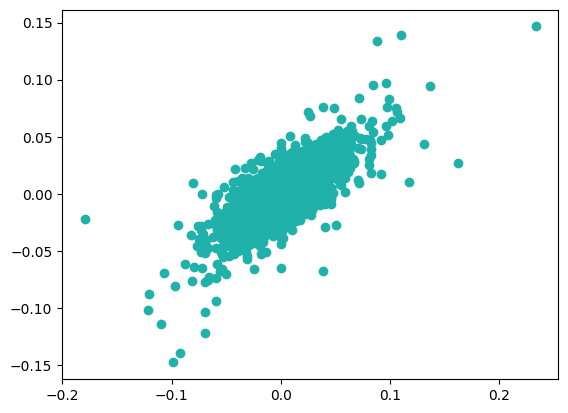

In [186]:
calcula_correlacao_amostral_pearson('ITUB4.SA', '^BVSP')

[*********************100%***********************]  2 of 2 completed
<ipython-input-179-0538006bae18>:4: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.



Correlação de Pearson, r=0.383 p-value=0.00000000


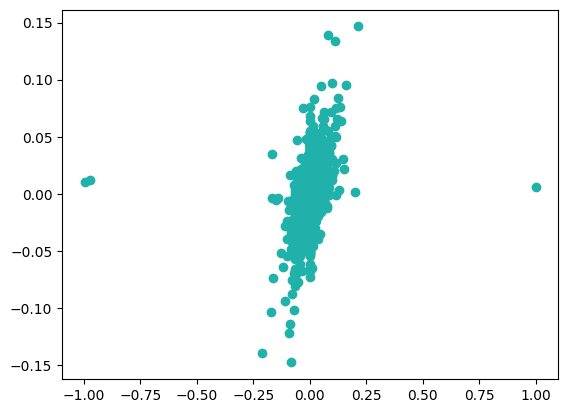

In [187]:
calcula_correlacao_amostral_pearson('LREN3.SA', '^BVSP')

In [188]:
selic = pd.read_csv('STP-20250406195338454.csv', sep=';')
selic.head(10)
selic.drop(columns=['11 - Taxa de juros - Selic - % a.d.'], inplace=True)
selic.head(10)

,Data,432 - Taxa de juros - Meta Selic definida pelo Copom - % a.a.
0,06/04/2024,"10,75"
1,07/04/2024,"10,75"
2,08/04/2024,"10,75"
3,09/04/2024,"10,75"
4,10/04/2024,"10,75"
5,11/04/2024,"10,75"
6,12/04/2024,"10,75"
7,13/04/2024,"10,75"
8,14/04/2024,"10,75"
9,15/04/2024,"10,75"


In [189]:
dados_ibov_sp500['Data']=dados_ibov_sp500.index
dados_ibov_sp500['Data']=pd.to_datetime(dados_ibov_sp500['Data']).dt.strftime('%d/%m/%Y')
dados_ibov_sp500

Ticker,^BVSP,^GSPC,^BVSP_norm,^GSPC_norm,Data
Date,,,,,
2000-01-03,16930.0,1455.219971,1.000000,1.000000,03/01/2000
2000-01-04,15851.0,1399.420044,0.936267,0.961655,04/01/2000
2000-01-05,16245.0,1402.109985,0.959539,0.963504,05/01/2000
2000-01-06,16107.0,1403.449951,0.951388,0.964425,06/01/2000
2000-01-07,16309.0,1441.469971,0.963320,0.990551,07/01/2000
...,...,...,...,...,...
2025-04-11,127682.0,5363.359863,7.541760,3.685601,11/04/2025
2025-04-14,129454.0,5405.970215,7.646426,3.714882,14/04/2025
2025-04-15,129245.0,5396.629883,7.634082,3.708463,15/04/2025


In [190]:
full=pd.merge(selic, dados_ibov_sp500, how='inner', on='Data')
full.drop(columns=['^BVSP_norm', '^GSPC_norm'], inplace=True)
full.rename(columns={'432 - Taxa de juros - Meta Selic definida pelo Copom - % a.a.':'Selic Meta'}, inplace=True)
full.head(10)

,Data,Selic Meta,^BVSP,^GSPC
0,08/04/2024,"10,75",128857.0,5202.390137
1,09/04/2024,"10,75",129890.0,5209.910156
2,10/04/2024,"10,75",128054.0,5160.640137
3,11/04/2024,"10,75",127396.0,5199.060059
4,12/04/2024,"10,75",125946.0,5123.410156
5,15/04/2024,"10,75",125334.0,5061.819824
6,16/04/2024,"10,75",124389.0,5051.410156
7,17/04/2024,"10,75",124171.0,5022.209961
8,18/04/2024,"10,75",124196.0,5011.120117
9,19/04/2024,"10,75",125124.0,4967.229980


In [192]:
full_novo = pd.DataFrame()
full_novo['selic_norm'] = full['Selic Meta'].str.replace(',', '.').astype(float) / full['Selic Meta'].str.replace(',', '.').astype(float).iloc[0]
full_novo['BVSP_norm'] = full['^BVSP'] / full['^BVSP'].iloc[0]
full_novo['GSPC_norm'] = full['^GSPC'] / full['^GSPC'].iloc[0]
full_novo.head()

,selic_norm,BVSP_norm,GSPC_norm
0,1.0,1.000000,1.000000
1,1.0,1.008017,1.001445
2,1.0,0.993768,0.991975
3,1.0,0.988662,0.999360
4,1.0,0.977409,0.984819


<Axes: >

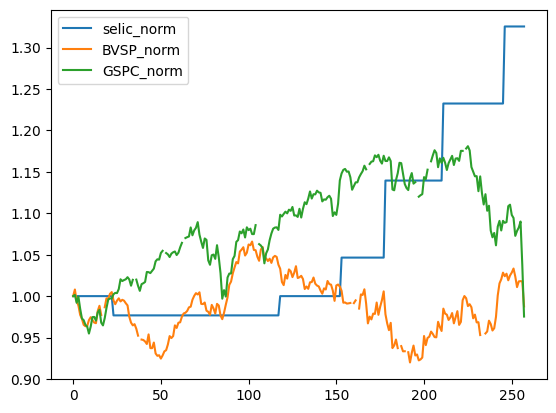

In [193]:
full_novo.plot()

In [194]:
ativos_novos = ['ABEV3.SA', 'GGBR4.SA', 'PETR4.SA', 'VALE3.SA', 'OIBR3.SA', 'CMIG3.SA', 'PRIO3.SA', 'LREN3.SA']
ativos_novos = yf.download(ativos_novos, period='max')['Close']
ativos_novos['Data']=ativos_novos.index
ativos_novos['Data']=pd.to_datetime(ativos_novos['Data']).dt.strftime('%d/%m/%Y')
ativos_novos.reset_index(drop=True, inplace=True)
full=pd.merge(full, ativos_novos, how='inner', on='Data')
full['Selic Meta']=full['Selic Meta'].str.replace(',', '.').astype(float)
full['Selic Meta'] = pd.to_numeric(full['Selic Meta'], errors='coerce')
full.head()

[*********************100%***********************]  8 of 8 completed


,Data,Selic Meta,^BVSP,^GSPC,ABEV3.SA,CMIG3.SA,GGBR4.SA,LREN3.SA,OIBR3.SA,PETR4.SA,PRIO3.SA,VALE3.SA
0,08/04/2024,10.75,128857.0,5202.390137,12.056151,10.819077,18.493332,14.964766,6.4,31.979836,49.660000,57.951504
1,09/04/2024,10.75,129890.0,5209.910156,12.244374,10.876285,18.373505,15.086926,6.4,32.062622,49.840000,57.564976
2,10/04/2024,10.75,128054.0,5160.640137,11.986807,10.797625,18.253677,14.284152,6.5,32.774574,50.189999,56.690685
3,11/04/2024,10.75,127396.0,5199.060059,12.085871,10.840529,18.269651,14.563378,6.4,32.534492,49.799999,56.929966
4,12/04/2024,10.75,125946.0,5123.410156,12.006619,10.626008,17.822298,14.013652,6.5,32.236469,50.860001,56.718300


<Axes: >

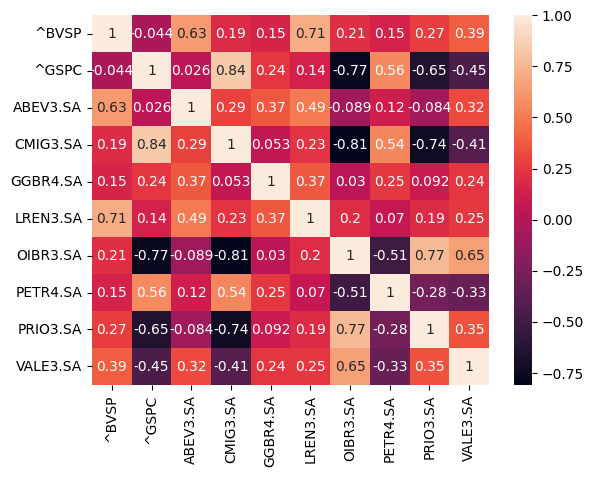

In [200]:
sb.heatmap(full.iloc[:,2:].corr(method='pearson'), annot=True)

In [201]:
lista_ativos_yf = ['^BVSP', '^GSPC', 'BRL=X']
dados_ativos_sp500=yf.download(lista_ativos_yf, start='2007-01-01', end='2024-12-31')['Close'].dropna()

[*********************100%***********************]  3 of 3 completed


In [202]:
dados_ativos_sp500.head()

Ticker,BRL=X,^BVSP,^GSPC
Date,,,
2007-01-03,2.1345,44445.0,1416.599976
2007-01-04,2.1390,44020.0,1418.339966
2007-01-05,2.1470,42245.0,1409.709961
2007-01-08,2.1465,42830.0,1412.839966
2007-01-09,2.1490,42007.0,1412.109985


<Axes: xlabel='Date'>

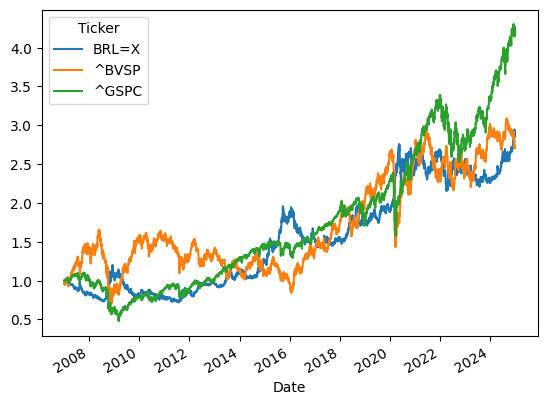

In [203]:
(dados_ativos_sp500/dados_ativos_sp500.iloc[0]).plot()

In [204]:
dados_ativos_sp500_filtrado=dados_ativos_sp500[dados_ativos_sp500.index.year>2018]
dados_ativos_sp500_filtrado.head()

Ticker,BRL=X,^BVSP,^GSPC
Date,,,
2019-01-02,3.8799,91012.0,2510.030029
2019-01-03,3.7863,91564.0,2447.889893
2019-01-04,3.7551,91841.0,2531.939941
2019-01-07,3.6612,91699.0,2549.689941
2019-01-08,3.7341,92032.0,2574.409912


In [205]:
corr, p = stats.pearsonr(dados_ativos_sp500['^BVSP'], dados_ativos_sp500['BRL=X'])
print('Correlação de Pearson, r=%.3f' %corr,'p-value=%.8f' %p)

Correlação de Pearson, r=0.821 p-value=0.00000000


In [206]:
corr, p = stats.pearsonr(dados_ativos_sp500['^BVSP'], dados_ativos_sp500['^GSPC'])
print('Correlação de Pearson, r=%.3f' %corr,'p-value=%.8f' %p)

Correlação de Pearson, r=0.907 p-value=0.00000000


In [207]:
corr, p = stats.pearsonr(dados_ativos_sp500['BRL=X'], dados_ativos_sp500['^GSPC'])
print('Correlação de Pearson, r=%.3f' %corr,'p-value=%.8f' %p)

Correlação de Pearson, r=0.924 p-value=0.00000000


In [208]:
corr, p = stats.pearsonr(dados_ativos_sp500_filtrado['^BVSP'], dados_ativos_sp500_filtrado['BRL=X'])
print('Correlação de Pearson, r=%.3f' %corr,'p-value=%.8f' %p)

Correlação de Pearson, r=0.279 p-value=0.00000000


In [209]:
corr, p = stats.pearsonr(dados_ativos_sp500_filtrado['^BVSP'], dados_ativos_sp500_filtrado['^GSPC'])
print('Correlação de Pearson, r=%.3f' %corr,'p-value=%.8f' %p)

Correlação de Pearson, r=0.804 p-value=0.00000000


In [210]:
corr, p = stats.pearsonr(dados_ativos_sp500_filtrado['BRL=X'], dados_ativos_sp500_filtrado['^GSPC'])
print('Correlação de Pearson, r=%.3f' %corr,'p-value=%.8f' %p)

Correlação de Pearson, r=0.605 p-value=0.00000000


In [211]:
from pingouin import partial_corr

In [212]:
partial_corr(data=dados_ativos_sp500_filtrado, x='^BVSP', y='BRL=X', covar='^GSPC')

,n,r,CI95%,p-val
pearson,1453,-0.439738,"[-0.48, -0.4]",1.037262e-69


In [213]:
partial_corr(data=dados_ativos_sp500_filtrado, x='^BVSP', y='^GSPC', covar='BRL=X')

,n,r,CI95%,p-val
pearson,1453,0.831088,"[0.81, 0.85]",0.0


In [214]:
partial_corr(data=dados_ativos_sp500_filtrado, x='BRL=X', y='^GSPC', covar='^BVSP')

,n,r,CI95%,p-val
pearson,1453,0.667842,"[0.64, 0.7]",3.415559e-188


<Axes: xlabel='Date'>

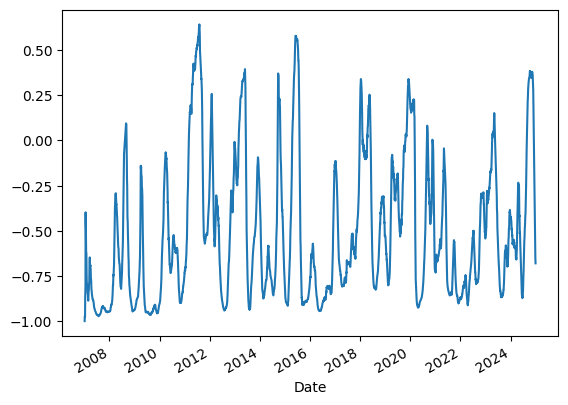

In [215]:
dados_ativos_sp500['^BVSP'].rolling(window='180D').corr(dados_ativos_sp500['BRL=X'], pairwise=True).plot()

In [216]:
oc_vale3=yf.download('VALE3.SA', start='2010-01-01')[['Open', 'Close']]

[*********************100%***********************]  1 of 1 completed


In [217]:
oc_vale3.head()

Price,Open,Close
Ticker,VALE3.SA,VALE3.SA
Date,,
2010-01-04,22.778795,23.368803
2010-01-05,23.391497,23.586653
2010-01-06,23.600273,24.085894
2010-01-07,23.831740,24.185745
2010-01-08,24.190278,24.421743


In [218]:
oc_vale3.columns=oc_vale3.columns.get_level_values(0)
oc_vale3.head()

Price,Open,Close
Date,,
2010-01-04,22.778795,23.368803
2010-01-05,23.391497,23.586653
2010-01-06,23.600273,24.085894
2010-01-07,23.831740,24.185745
2010-01-08,24.190278,24.421743


In [219]:
oc_vale3['Close_Anterior'] = oc_vale3['Close'].shift(1)
oc_vale3['Gap_Abertura'] = oc_vale3['Open']-oc_vale3['Close_Anterior']
oc_vale3['Resultado'] = oc_vale3['Close'].pct_change()
oc_vale3.dropna(inplace=True)
oc_vale3.head(10)

Price,Open,Close,Close_Anterior,Gap_Abertura,Resultado
Date,,,,,
2010-01-05,23.391497,23.586653,23.368803,0.022694,0.009322
2010-01-06,23.600273,24.085894,23.586653,0.013620,0.021166
2010-01-07,23.831740,24.185745,24.085894,-0.254154,0.004146
2010-01-08,24.190278,24.421743,24.185745,0.004533,0.009758
2010-01-11,24.780286,24.349129,24.421743,0.358543,-0.002973
2010-01-12,23.963346,24.281042,24.349129,-0.385783,-0.002796
2010-01-13,24.598748,24.580593,24.281042,0.317705,0.012337
2010-01-14,24.589669,24.576054,24.580593,0.009075,-0.000185
2010-01-15,24.408124,24.258354,24.576054,-0.167929,-0.012927


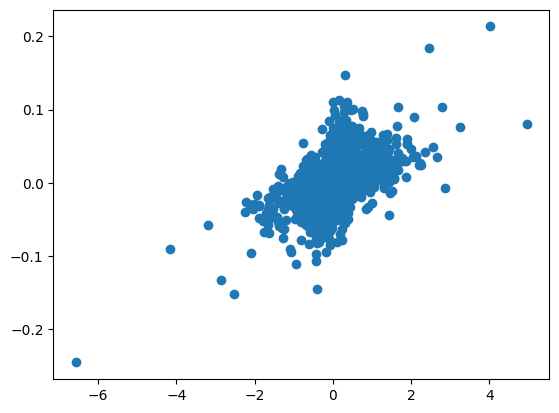

In [220]:
plt.scatter(oc_vale3['Gap_Abertura'], oc_vale3['Resultado'])

In [221]:
slope, intercept, r, p, std_erro = stats.linregress(oc_vale3['Gap_Abertura'], oc_vale3['Resultado'])
print("Beta1:",slope, "Beta0: ",intercept, "R²:", r**2, "p-value", p, "Erro-Padrão",std_erro)

Beta1: 0.02666338409045731 Beta0:  -0.0005005382663124841 R²: 0.26072340893410834 p-value 2.9180199014280524e-251 Erro-Padrão 0.000728824298152045


In [222]:
x = sm.add_constant(oc_vale3['Gap_Abertura'])

In [223]:
est=sm.OLS(oc_vale3['Resultado'], x).fit()

In [224]:
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Resultado   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     1338.
Date:                Sat, 19 Apr 2025   Prob (F-statistic):          2.92e-251
Time:                        23:58:41   Log-Likelihood:                 9207.8
No. Observations:                3797   AIC:                        -1.841e+04
Df Residuals:                    3795   BIC:                        -1.840e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0005      0.000     -1.436      0.151      -0.001       0.000
Gap_Abertura     0.0267      0.001     36.584      0.000       0.025       0.028
==============================================================================
Omnibus:                      370.322   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1902.585
Skew:                           0.324   Prob(JB):                         0.00
Kurtosis:                       6.407   Cond. No.                         2.10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

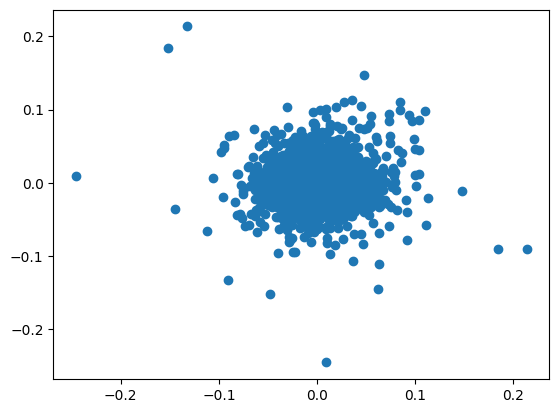

In [225]:
oc_vale3['Resultado_Anterior'] = oc_vale3['Resultado'].shift(1)
oc_vale3.dropna(inplace=True)
plt.scatter(oc_vale3['Resultado_Anterior'], oc_vale3['Resultado'])

In [226]:
slope, intercept, r, p, std_error = stats.linregress(oc_vale3['Resultado_Anterior'], oc_vale3['Resultado'])
print("Beta1:",slope, "Beta0: ",intercept, "R²:", r**2, "p-value", p, "Erro-Padrão",std_error)

Beta1: 0.011280444612587913 Beta0:  0.0005168666829121151 R²: 0.00012725094182656702 p-value 0.48717607956963804 Erro-Padrão 0.016233771082465417


In [227]:
sm.OLS(oc_vale3['Resultado'], sm.add_constant(oc_vale3['Resultado_Anterior'])).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Resultado   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.4829
Date:                Sat, 19 Apr 2025   Prob (F-statistic):              0.487
Time:                        23:59:44   Log-Likelihood:                 8631.9
No. Observations:                3796   AIC:                        -1.726e+04
Df Residuals:                    3794   BIC:                        -1.725e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0005      0.000      1.278      0.201      -0.000       0.001
Resultado_Anterior     0.0113      0.016      0.695      0.487      -0.021       0.043
==============================================================================
Omnibus:                      571.245   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8534.722
Skew:                           0.155   Prob(JB):                         0.00
Kurtosis:                      10.339   Cond. No.                         40.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""